# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Stroke Data Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

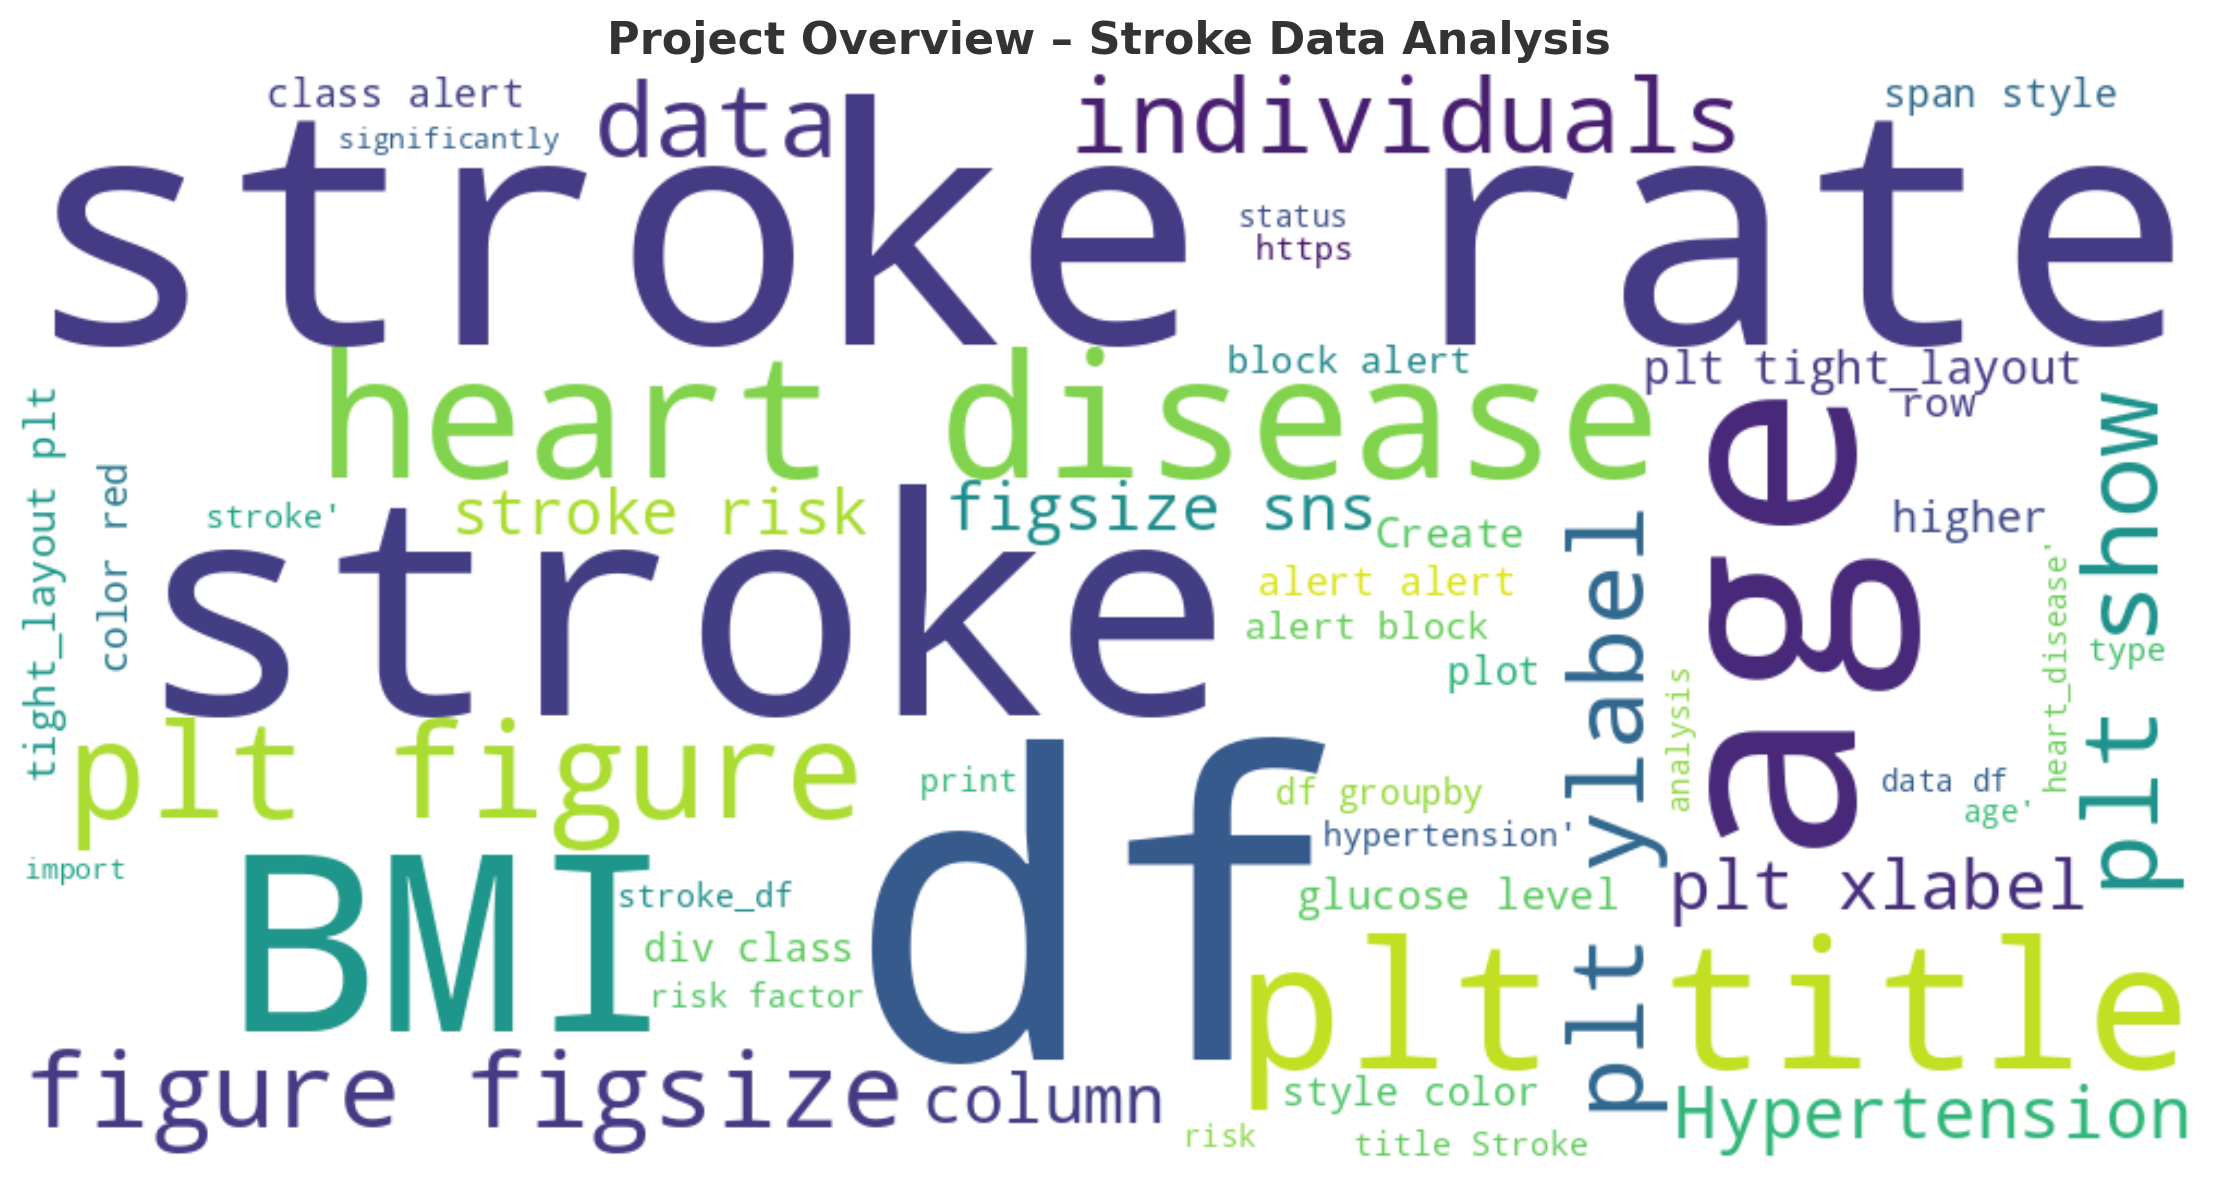

<div class="alert alert-block alert-warning">

# <span style=" color:red"> Stroke Data Project
</span>

Welcome to the data analysis assignment on the Stroke Data Project! In this assignment, we will work with a dataset containing information about various strokes. According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient. Through this analysis, you will gain hands-on experience in essential data analysis steps, including data cleaning, visualization, and exploratory data analysis (EDA).

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration
</span>

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()

In [87]:
# Import necessary libraries

import numpy as np                            # for numerical operations expecillay on arrays
import pandas as pd                           # DataFrame structure for data manipulation and analysis 
import matplotlib.pyplot as plt               # basic visulization library in Python for plotting
import seaborn as sns                         # for statistical data visualization

In [88]:
import warnings                               # suppress warnings
warnings.filterwarnings("ignore")             # ignore all warnings
warnings.warn("this will not show")           # suppress all warnings

In [89]:
# Load the dataset
df0 = pd.read_csv('healthcare-dataset-stroke-data.csv') 
df = df0.copy()

In [90]:
# Display the first few rows in ordor to check the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [91]:
# id is not proper feauture for analysis, so we can drop it, but we will keep it for future reference and set it as index
df.set_index('id', inplace=True)


In [92]:
df.head()                                       # redisplay the first few rows after setting index

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [94]:
df.shape

(5110, 11)

In [95]:

# Check the structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [96]:
# Get basic statistics for numerical columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [97]:
df.describe().T          # Transpose for better readability

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


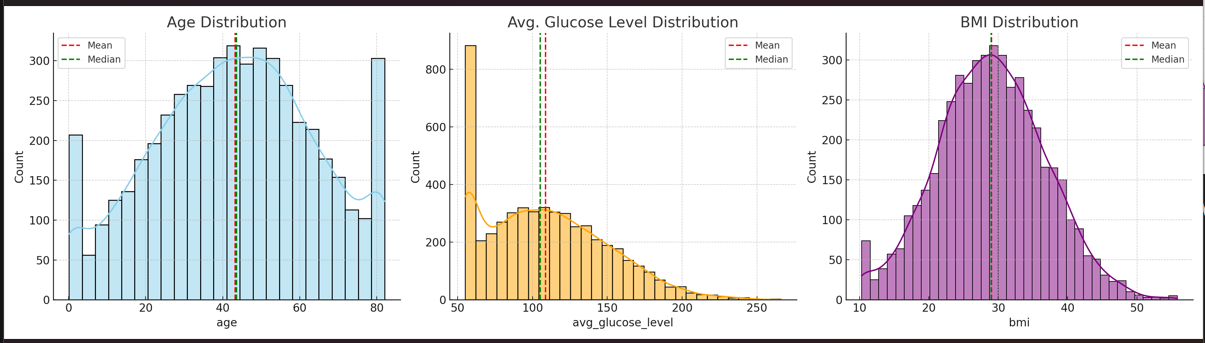

### The average age is 43.2 with a median of 45.0, indicating a fairly symmetric distribution; the standard deviation of 22.6 shows a wide spread across age groups.
### The average glucose level is 106.1, while the median is 91.9, and a high standard deviation of 45.3 suggests a right-skewed distribution.
### For BMI, the mean is 28.89, the median is 28.10, and the standard deviation is 7.85, indicating that most individuals are in or near the overweight category.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 
</span>

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

In [98]:
# Check missing values per column
df.isnull().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [99]:
# Option 1: Drop rows with missing values
# df_cleaned = df.dropna()

# Option 2: Fill missing values with a specific value or method
# Example: Fill numeric columns with the median
df.fillna(df.median(numeric_only=True), inplace=True)


In [100]:
df.isnull().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [101]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [102]:
list(df.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [103]:
# Strip whitespace, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [105]:
print(df.columns.tolist())



['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [106]:
list(df.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [108]:
df.dtypes


gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Memory efficiency:

Categorical columns use much less memory than object/string columns, especially when they have repeated values.

Faster processing:

Operations like sorting, grouping, and filtering are faster on categorical data.

Better handling in machine learning and plotting:

Libraries like scikit-learn and seaborn treat categorical variables differently (and more appropriately) when the data type is explicitly set.

In [111]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
for col in categorical_columns:
    df[col] = df[col].astype('category')


We converted text-based columns into categorical format to make our dataset more memory-efficient, analysis-ready, and machine-learning-friendly.

In [114]:
df.dtypes


gender               category
age                   float64
hypertension            int64
heart_disease           int64
ever_married         category
work_type            category
residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal
</span>

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does age influence stroke occurrence?
</span>

In [130]:
df.sample(10) # display the first few rows after setting index

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
49939,Female,54.0,0,0,Yes,Self-employed,Urban,56.75,26.9,never smoked,0
63158,Male,17.0,0,0,No,Private,Urban,63.28,40.2,Unknown,0
68601,Female,18.0,0,0,No,Private,Urban,67.92,19.4,never smoked,0
40240,Male,40.0,1,0,Yes,Self-employed,Urban,93.20,24.8,smokes,0
491,Female,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1
56001,Male,57.0,0,0,Yes,Private,Rural,82.08,24.7,Unknown,0
46455,Female,61.0,0,0,Yes,Private,Urban,125.74,32.6,Unknown,0
37640,Female,67.0,0,0,Yes,Govt_job,Rural,125.33,26.4,Unknown,0
53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [115]:
df.groupby('stroke')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


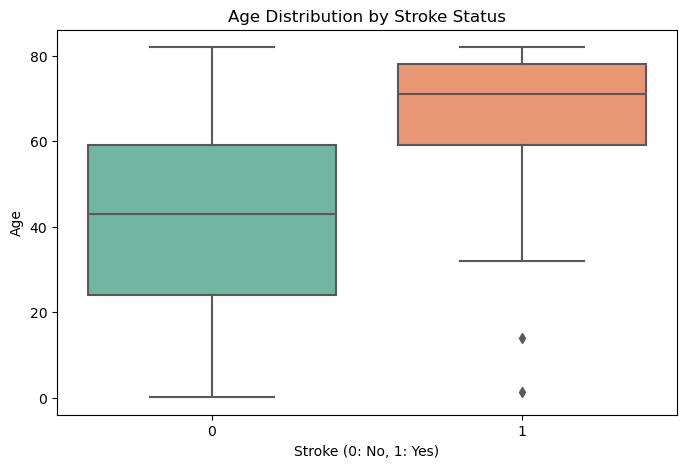

In [132]:
# Create a boxplot to visualize age distribution by stroke status
plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Stroke Status')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


### This boxplot illustrates that individuals who experienced a stroke (stroke = 1) tend to be **significantly older**, with a higher median age and a narrower age range, confirming that **stroke is predominantly associated with older populations**.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


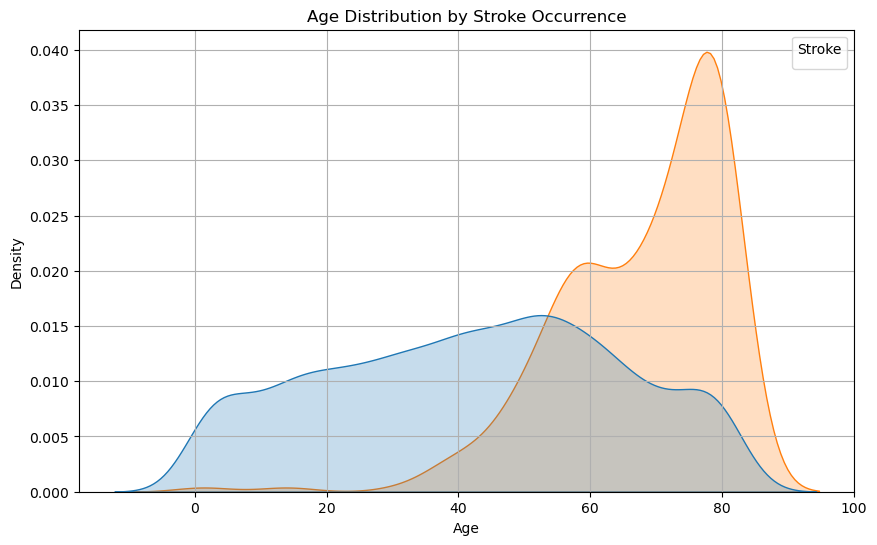

In [133]:

# Create a new plot comparing age distributions by stroke status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='stroke', common_norm=False, fill=True)
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Density') 
plt.legend(title='Stroke')
plt.grid(True)
plt.show()


### This KDE plot shows that **stroke occurrences are significantly more concentrated among older individuals**, especially those over the age of 60, while younger age groups have a much lower stroke density.


In [134]:
# Filtrele: stroke geçirenler
stroke_cases = df[df['stroke'] == 1]

# 60 yaş üstü stroke geçirenlerin oranı
over_60_ratio = (stroke_cases['age'] > 60).sum() / len(stroke_cases) * 100

print(f"%{over_60_ratio:.2f} of stroke cases are over 60 years old.")


%71.08 of stroke cases are over 60 years old.


In [135]:
# Filtrele: stroke geçirenler
stroke_cases = df[df['stroke'] == 1]

# 60 yaş üstü stroke geçirenlerin oranı
over_60_ratio = (stroke_cases['age'] > 70).sum() / len(stroke_cases) * 100

print(f"%{over_60_ratio:.2f} of stroke cases are over 60 years old.")


%51.41 of stroke cases are over 60 years old.


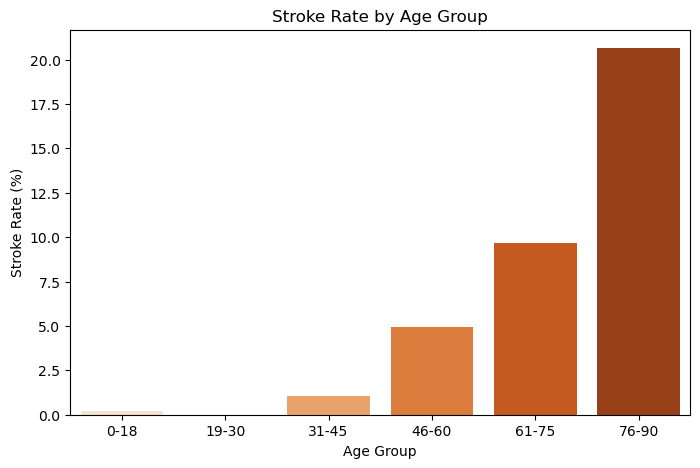

In [137]:
# Create age group categories based on age ranges
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 75, 90],
                         labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76-90'])

# Calculate the average stroke rate per age group and multiply by 100
age_group_stroke = df.groupby('age_group')['stroke'].mean().reset_index()
age_group_stroke['stroke'] *= 100  # Convert to percentage

# Plot stroke rate by age group
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='stroke', data=age_group_stroke, palette='Oranges')
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate (%)')

plt.show()


### This bar plot clearly shows that **stroke rates increase significantly with age**, with the **76–90 age group having the highest stroke risk**, highlighting age as a critical factor in stroke occurrence.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do body mass index (BMI) and glucose levels jointly or independently increase stroke risk?
</span>

In [138]:
df.groupby('stroke')['bmi'].mean()

stroke
0    28.799115
1    30.090361
Name: bmi, dtype: float64

In [139]:
# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new column for BMI category
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Print the number of entries in each BMI category
print(df['bmi_category'].value_counts())


bmi_category
Obese          1920
Overweight     1610
Normal         1231
Underweight     349
Name: count, dtype: int64


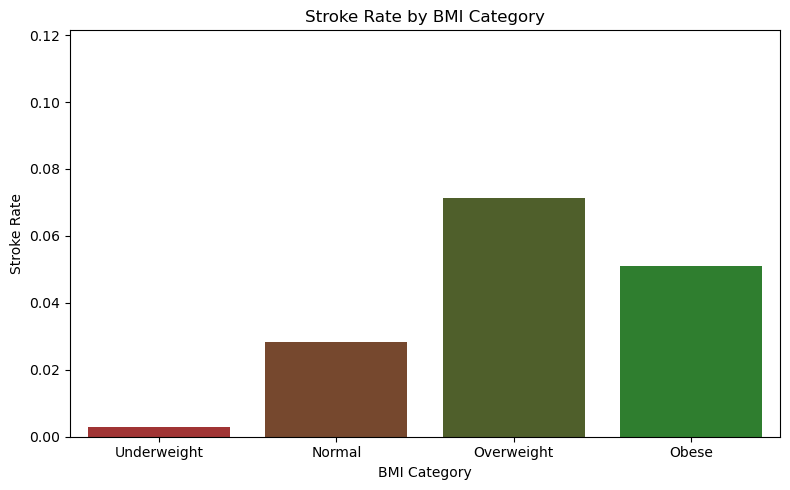

In [140]:
# Calculate stroke rate for each BMI category
bmi_stroke_rate = df.groupby('bmi_category')['stroke'].mean().reset_index()
bmi_stroke_rate = bmi_stroke_rate.sort_values('stroke', ascending=False).reset_index(drop=True)

import matplotlib
from matplotlib.colors import LinearSegmentedColormap

# Create a red-to-green gradient palette for the bars
if len(bmi_stroke_rate) > 1:
    custom_palette = LinearSegmentedColormap.from_list("red2green", ["#B22222", "#228B22"], N=len(bmi_stroke_rate))
    colors = [custom_palette(i / (len(bmi_stroke_rate) - 1)) for i in range(len(bmi_stroke_rate))]
else:
    colors = ["#B22222"]

# Plot the stroke rate by BMI category
plt.figure(figsize=(8,5))
sns.barplot(
    x='bmi_category',
    y='stroke',
    data=bmi_stroke_rate,
    palette=colors
)
plt.title('Stroke Rate by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Stroke Rate')
plt.ylim(0, bmi_stroke_rate['stroke'].max() + 0.05)
plt.tight_layout()
plt.show()


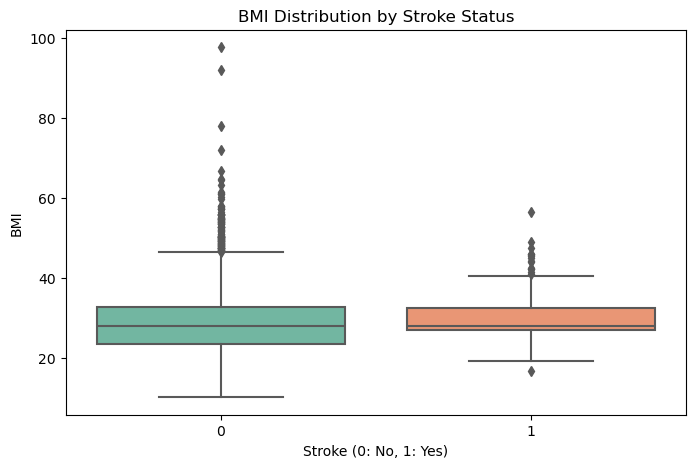

In [141]:
# Create a boxplot to visualize BMI distribution by stroke status
plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='bmi', data=df, palette='Set2')
plt.title('BMI Distribution by Stroke Status')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.show()

### This bar chart shows that individuals categorized as **Overweight** have the highest stroke rate, followed by those who are **Obese**, while **Underweight** individuals have the lowest stroke risk among all BMI groups.


In [152]:
# Create glucose level categories
bins = [0, 99, 125, 1000]
labels = ['Normal', 'Prediabetes', 'Diabetes']

# Assign a glucose category based on average glucose level
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels)

# Print the count of records in each glucose category
print(df['glucose_category'].value_counts())


glucose_category
Normal         3071
Prediabetes    1039
Diabetes       1000
Name: count, dtype: int64


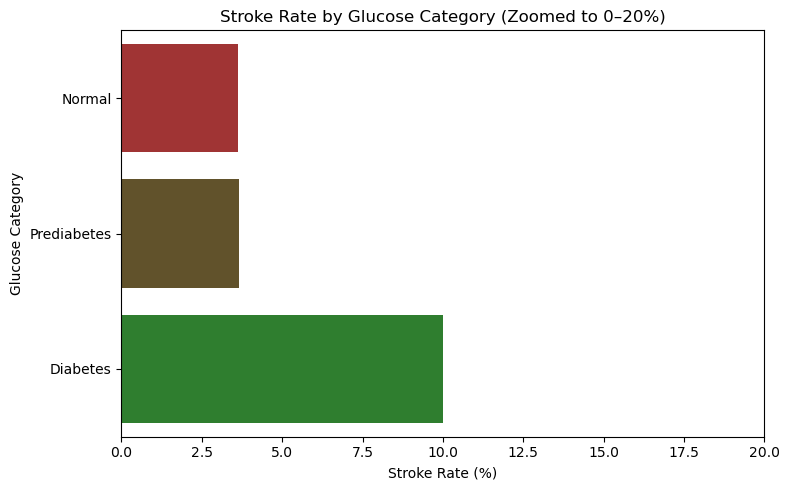

In [154]:
# Calculate stroke rate by glucose category and convert to percentage
glucose_stroke_rate = df.groupby('glucose_category')['stroke'].mean().reset_index()
glucose_stroke_rate['stroke'] *= 100  # Convert to %

# Sort for better visualization
glucose_stroke_rate = glucose_stroke_rate.sort_values('stroke', ascending=False).reset_index(drop=True)

# Color palette
from matplotlib.colors import LinearSegmentedColormap
custom_palette = LinearSegmentedColormap.from_list("red2green", ["#B22222", "#228B22"], N=len(glucose_stroke_rate))
colors = [custom_palette(i / (len(glucose_stroke_rate) - 1)) for i in range(len(glucose_stroke_rate))]

# Plot focusing on 0–20% range
plt.figure(figsize=(8, 5))
sns.barplot(
    y='glucose_category',
    x='stroke',
    data=glucose_stroke_rate,
    palette=colors,
    orient='h'
)
plt.title('Stroke Rate by Glucose Category (Zoomed to 0–20%)')
plt.xlabel('Stroke Rate (%)')
plt.ylabel('Glucose Category')
plt.xlim(0, 20)  # Focus on 0–20% range
plt.tight_layout()
plt.show()


### This bar chart shows that individuals classified as **Diabetic** have a significantly higher stroke rate compared to those in the **Prediabetes** and **Normal** glucose categories, highlighting elevated glucose levels as a strong risk factor for stroke.


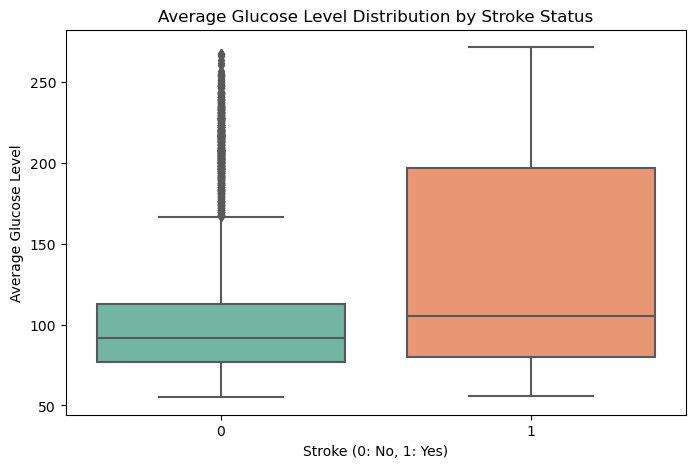

In [155]:
# Create a boxplot to visualize average glucose level distribution by stroke status
plt.figure(figsize=(8,5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke Status')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Average Glucose Level')
plt.show()


### This boxplot shows that individuals who experienced a stroke tend to have higher and more widely distributed average glucose levels, indicating a potential link between elevated glucose and stroke risk.

### This scatter plot shows that **stroke cases (orange points) are more concentrated among individuals with higher glucose levels**, regardless of BMI, suggesting that **elevated glucose is more strongly associated with stroke occurrence than BMI alone**.


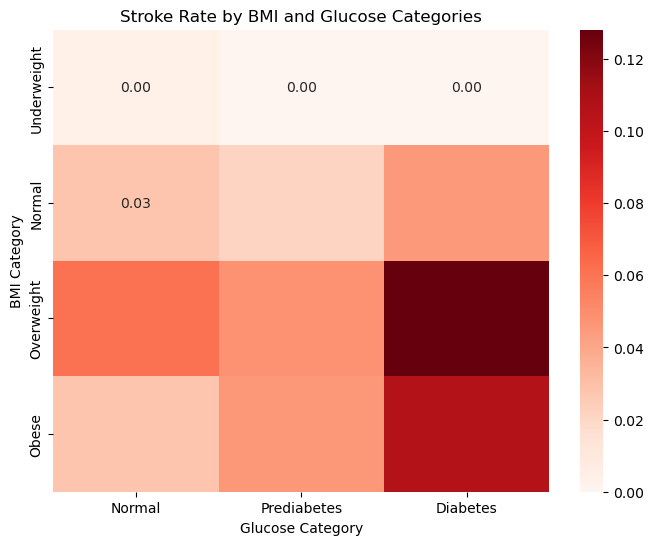

In [71]:
# Analyze stroke rate by combining BMI and glucose categories
pivot = pd.pivot_table(
    df, 
    values='stroke', 
    index='bmi_category', 
    columns='glucose_category', 
    aggfunc='mean'
)

# Plot heatmap of stroke rates by BMI and glucose category
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt=".2f")
plt.title('Stroke Rate by BMI and Glucose Categories')
plt.xlabel('Glucose Category')
plt.ylabel('BMI Category')
plt.show()


### This heatmap shows that the **highest stroke rates occur among individuals who are both Overweight or Obese and classified as Diabetic**, indicating a strong combined effect of elevated BMI and glucose on stroke risk.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Can smoking increase the likelihood of stroke?
</span>

In [156]:
# Ensure 'stroke' is numeric for this operation
df['stroke_numeric'] = df['stroke'].astype(int)

# Now group and calculate stroke rate
stroke_rate = df.groupby('smoking_status')['stroke_numeric'].mean() * 100
print(stroke_rate.sort_values(ascending=False))


smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke_numeric, dtype: float64


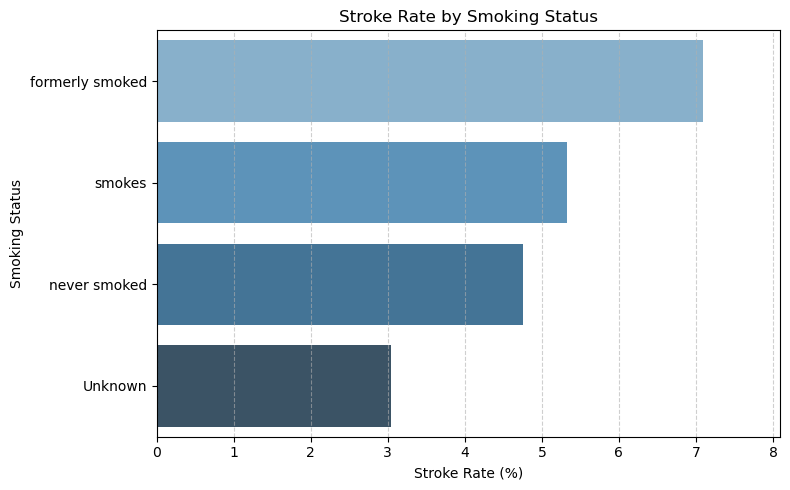

In [159]:


# Recreate the stroke rate data
stroke_rate_data = {
    'smoking_status': ['formerly smoked', 'smokes', 'never smoked', 'Unknown'],
    'stroke_rate': [7.090605, 5.323194, 4.756871, 3.044041]
}

# Create a DataFrame
stroke_df = pd.DataFrame(stroke_rate_data)
stroke_df = stroke_df.sort_values(by='stroke_rate', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='stroke_rate', y='smoking_status', data=stroke_df, palette='Blues_d')
plt.title('Stroke Rate by Smoking Status')
plt.xlabel('Stroke Rate (%)')
plt.ylabel('Smoking Status')
plt.xlim(0, max(stroke_df['stroke_rate']) + 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### This bar chart shows that individuals who **formerly smoked** have the highest stroke rate, followed by **current smokers**, while those who **never smoked** and with **unknown smoking status** have comparatively lower stroke risk.


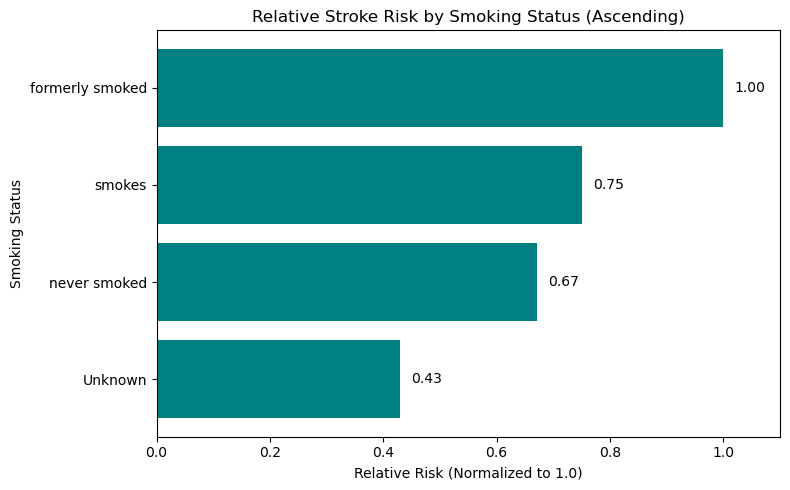

In [162]:
# Stroke rate data (örnek veriler)
stroke_rate_data = {
    'smoking_status': ['formerly smoked', 'smokes', 'never smoked', 'Unknown'],
    'stroke_rate': [7.090665, 5.323194, 4.756871, 3.044041]
}

import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
stroke_df = pd.DataFrame(stroke_rate_data)

# Normalize stroke rates
max_rate = stroke_df['stroke_rate'].max()
stroke_df['relative_rate'] = stroke_df['stroke_rate'] / max_rate

# Sort by relative risk in ascending order (lowest to highest)
stroke_df = stroke_df.sort_values(by='relative_rate', ascending=True)

# Plot again with lowest risk on top
plt.figure(figsize=(8, 5))
plt.barh(stroke_df['smoking_status'], stroke_df['relative_rate'], color='teal')
plt.title('Relative Stroke Risk by Smoking Status (Ascending)')
plt.xlabel('Relative Risk (Normalized to 1.0)')
plt.ylabel('Smoking Status')
plt.xlim(0, 1.1)

# Add value labels
for i, val in enumerate(stroke_df['relative_rate']):
    plt.text(val + 0.02, i, f"{val:.2f}", va='center')

plt.tight_layout()
plt.show()



### The chart shows that individuals who **formerly smoked** have the highest stroke risk with a relative value of **1.00**, followed by **current smokers** at **0.75**, **those who never smoked** at **0.67**, and the **unknown group** at **0.43**, indicating a clear upward trend in stroke risk based on smoking history.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do individuals with heart disease face a higher stroke risk?
</span>

In [164]:
# Temporarily convert 'stroke' to int
df['stroke_numeric'] = df['stroke'].astype(int)

# Now group by heart disease and calculate stroke rate
stroke_rate_by_heart = df.groupby('heart_disease')['stroke_numeric'].mean() * 100
print(stroke_rate_by_heart)



heart_disease
0     4.178734
1    17.028986
Name: stroke_numeric, dtype: float64


In [168]:
# Stroke geçiren bireyler arasında heart disease oranı
p_hd_given_stroke = df[df['stroke'] == 1]['heart_disease'].mean()

# Stroke geçirmeyen bireyler arasında heart disease oranı
p_hd_given_no_stroke = df[df['stroke'] == 0]['heart_disease'].mean()

# Kaç kat fark var?
odds_ratio = p_hd_given_stroke / p_hd_given_no_stroke

print(f"Heart disease is {odds_ratio:.2f} times more likely among stroke patients.")


Heart disease is 4.01 times more likely among stroke patients.


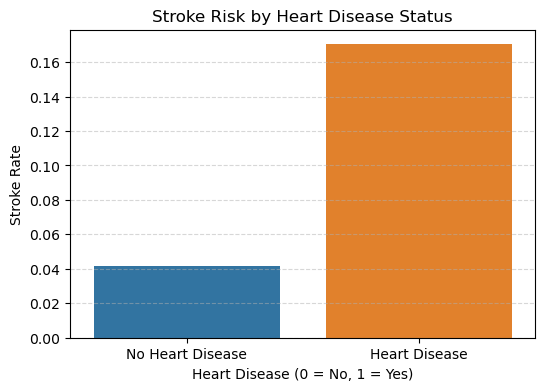

In [165]:

# First, ensure numeric version of stroke
df['stroke_numeric'] = df['stroke'].astype(int)

# Now plot using the numeric column
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='heart_disease', y='stroke_numeric', errorbar=None)
plt.title('Stroke Risk by Heart Disease Status')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


### This bar chart shows that individuals with **heart disease** have a significantly **higher stroke rate** compared to those without heart disease, highlighting it as a major risk factor for stroke.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Does work-related stress contribute to hypertension and subsequently to strokes?
</span>

In [175]:
# % of people with hypertension and % with stroke in each work type
summary = (
    df.groupby('work_type')[['hypertension', 'stroke']]
    .mean()                       # gives rates (0-1)
    .mul(100)                     # convert to %
    .round(2)
    .sort_values('hypertension')  # low → high stress proxy
)
display(summary.head())           # quick table view


,hypertension,stroke
work_type,,
Never_worked,0.00,0.00
children,0.00,0.29
Private,9.61,5.09
Govt_job,11.11,5.02
Self-employed,17.58,7.94


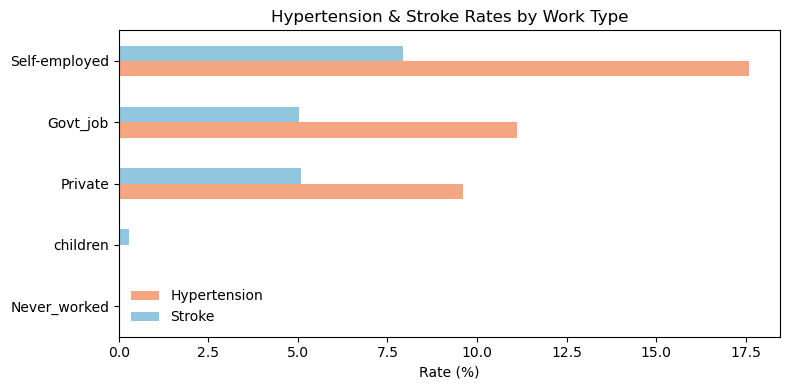

In [176]:
summary.plot(kind='barh', figsize=(8,4),
             color=['#f4a582', '#92c5de'])
plt.title('Hypertension & Stroke Rates by Work Type')
plt.xlabel('Rate (%)'); plt.ylabel('')
plt.legend(['Hypertension', 'Stroke'], frameon=False)
plt.tight_layout()


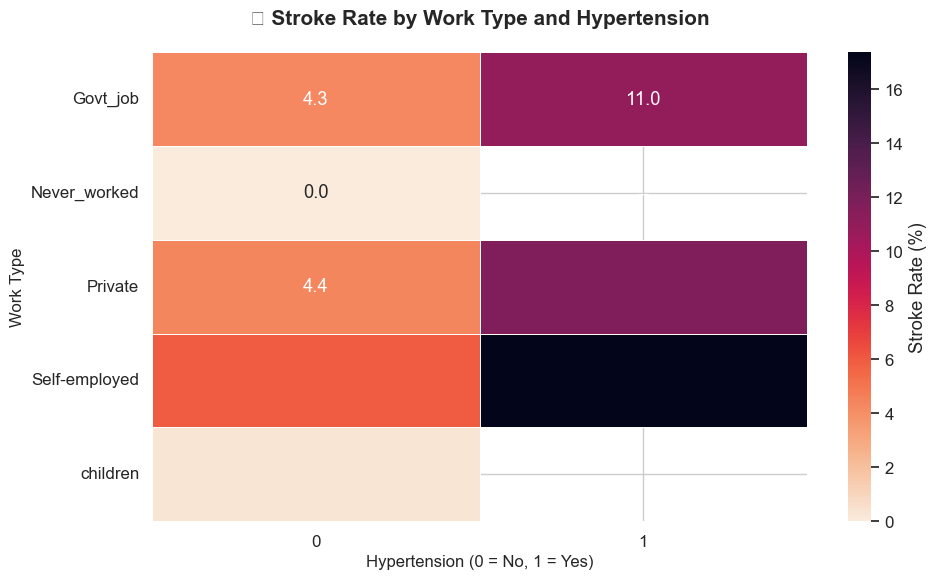

In [186]:

heatmap_data = df.groupby(['work_type', 'hypertension'])['stroke'].mean().unstack() * 100

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.1)
sns.set_style("whitegrid")

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    linecolor='white',
    cmap="rocket_r",  
    mask=heatmap_data.isnull(),
    cbar_kws={'label': 'Stroke Rate (%)'}
)

plt.title('🔬 Stroke Rate by Work Type and Hypertension', fontsize=15, weight='bold', pad=20)
plt.xlabel('Hypertension (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Work Type', fontsize=12)

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### These graphs show that self-employed individuals have the highest rates of both hypertension and stroke. The heatmap confirms that among hypertensive individuals, stroke risk is significantly higher—especially in stressful occupations like self-employment.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Are males at higher risk of strokes due to work-related or lifestyle stress?
</span>

In [188]:
# Stroke oranlarını cinsiyet ve iş türüne göre hesapla
stroke_by_gender_work = (
    df.groupby(['gender', 'work_type'])['stroke']
    .mean()
    .unstack()
    .mul(100)  # yüzdeye çevir
    .round(2)
)


<Figure size 1000x600 with 0 Axes>

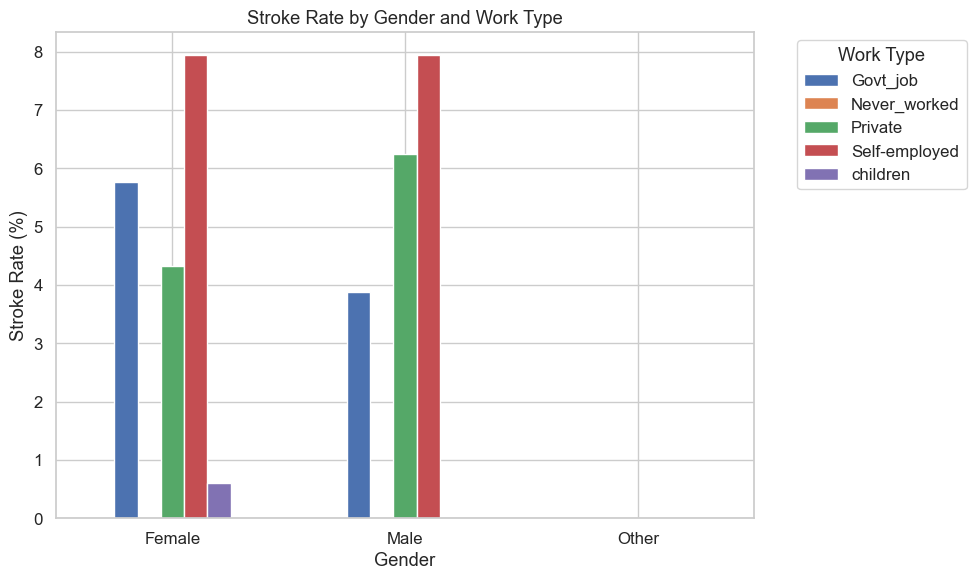

In [189]:
# Bar grafiği çiz
plt.figure(figsize=(10, 6))
stroke_by_gender_work.plot(kind='bar', figsize=(10, 6))

plt.title('Stroke Rate by Gender and Work Type')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### The chart shows that males in self-employed and private jobs have the highest stroke rates compared to other work types. This suggests that work-related or lifestyle stress may contribute more significantly to stroke risk in males.

<div class="alert alert-block alert-success">

### <span style=" color:red"> How does the combination of risk factors amplify stroke likelihood?
</span>

In [ ]:
# Create binary features for age and BMI thresholds
df['age_over_60'] = df['age'] > 60
df['bmi_over_30'] = df['bmi'] > 30


In [191]:
# Tgroup by multiple risk factors and calculate stroke rate
risk_combo = df.groupby([
    'hypertension', 
    'heart_disease', 
    'smoking_status', 
    'age_over_60', 
    'bmi_over_30', 
    'work_type'
])['stroke'].mean().reset_index()

risk_combo['stroke'] *= 100  # convert to percentage


In [192]:
# Create a readable combination label
risk_combo['combo'] = risk_combo.apply(
    lambda row: f"HT:{row.hypertension}, HD:{row.heart_disease}, SM:{row.smoking_status}, "
                f"Age60+:{row.age_over_60}, BMI30+:{row.bmi_over_30}, Work:{row.work_type}", axis=1
)

# the most risky combinations
top_combos = risk_combo.sort_values(by='stroke', ascending=False).head(15)


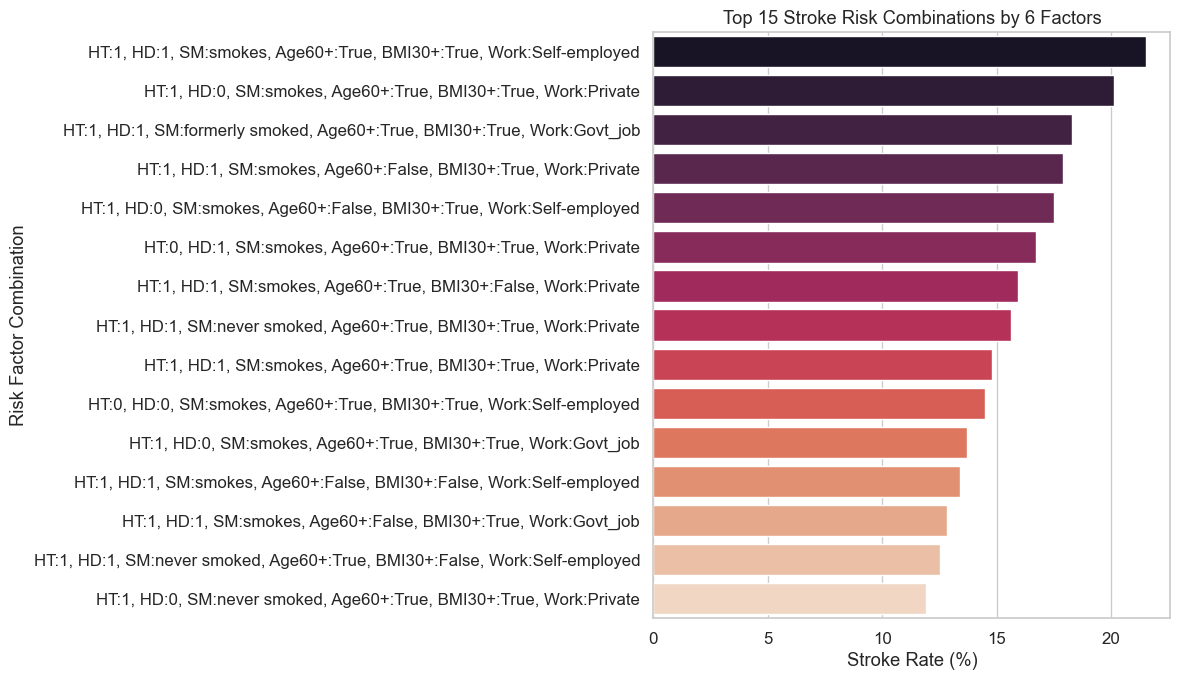

In [195]:
# Plot the top 8 combinations

plt.figure(figsize=(12, 7))
sns.barplot(data=top_combos, x='stroke', y='combo', palette='rocket')
plt.title('Top 15 Stroke Risk Combinations by 6 Factors')
plt.xlabel('Stroke Rate (%)')
plt.ylabel('Risk Factor Combination')
plt.tight_layout()
plt.show()


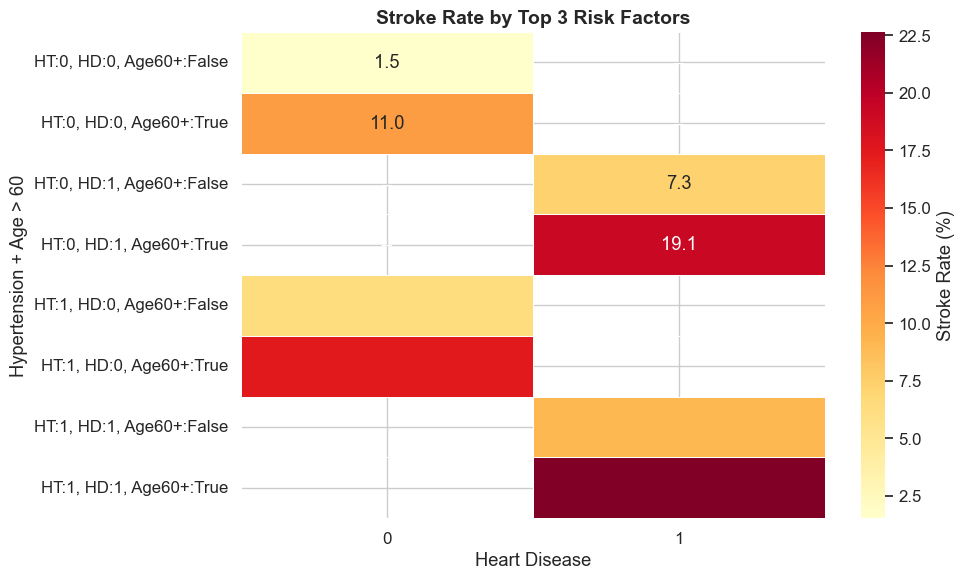

In [197]:
# ✅ Create binary column for age > 60
df['age_over_60'] = df['age'] > 60

# ✅ Group by 3 top risk factors and calculate stroke rate
risk_summary = df.groupby(['hypertension', 'heart_disease', 'age_over_60'])['stroke'].mean().reset_index()
risk_summary['stroke'] *= 100  # Convert to percentage

# ✅ Create combo labels
risk_summary['combo'] = risk_summary.apply(
    lambda row: f"HT:{row.hypertension}, HD:{row.heart_disease}, Age60+:{row.age_over_60}",
    axis=1
)

# ✅ Pivot for heatmap
heatmap_data = risk_summary.pivot(index='combo', columns='heart_disease', values='stroke')

# ✅ Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5,
            cbar_kws={'label': 'Stroke Rate (%)'})
plt.title("Stroke Rate by Top 3 Risk Factors", fontsize=14, fontweight='bold')
plt.ylabel("Hypertension + Age > 60")
plt.xlabel("Heart Disease")
plt.tight_layout()
plt.show()

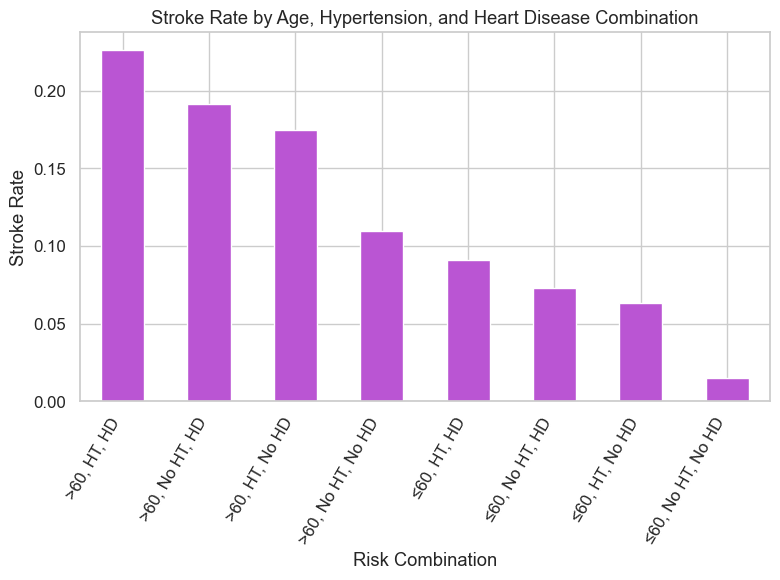

In [198]:
# Ensure necessary columns are numeric
df['stroke_numeric'] = df['stroke'].astype(int)
df['heart_disease'] = df['heart_disease'].astype(int)
df['hypertension'] = df['hypertension'].astype(int)
df['age_over_60'] = df['age'] > 60
df['is_smoker'] = df['smoking_status'] == 'smokes'

# --- Option 1: Specific combinations (Age > 60, HT, HD)
df['risk_combo'] = df['age_over_60'].astype(str) + '_' + df['hypertension'].astype(str) + '_' + df['heart_disease'].astype(str)
combo_rates = df.groupby('risk_combo')['stroke_numeric'].mean()

# Label mapping
combo_labels = {
    'False_0_0': '≤60, No HT, No HD',
    'False_0_1': '≤60, No HT, HD',
    'False_1_0': '≤60, HT, No HD',
    'False_1_1': '≤60, HT, HD',
    'True_0_0':  '>60, No HT, No HD',
    'True_0_1':  '>60, No HT, HD',
    'True_1_0':  '>60, HT, No HD',
    'True_1_1':  '>60, HT, HD'
}
combo_rates.index = combo_rates.index.map(combo_labels)
combo_rates = combo_rates.sort_values(ascending=False)

# Plot combination risk chart
plt.figure(figsize=(8, 6))
combo_rates.plot(kind='bar', color='mediumorchid')
plt.title('Stroke Rate by Age, Hypertension, and Heart Disease Combination')
plt.ylabel('Stroke Rate')
plt.xlabel('Risk Combination')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


### This bar chart shows that the **likelihood of stroke increases significantly with the combined presence of age over 60, hypertension, and heart disease**, with the highest risk observed when all three factors are present.


<div class="alert alert-block alert-success">

### <span style=" color:red"> Do lifestyle and residence type influence stroke patterns?
</span>

In [199]:
# Ensure stroke is numeric
df['stroke_numeric'] = df['stroke'].astype(int)

# Calculate stroke rate
stroke_by_residence = df.groupby('residence_type')['stroke_numeric'].mean() * 100
print(stroke_by_residence)


residence_type
Rural    4.534606
Urban    5.200308
Name: stroke_numeric, dtype: float64


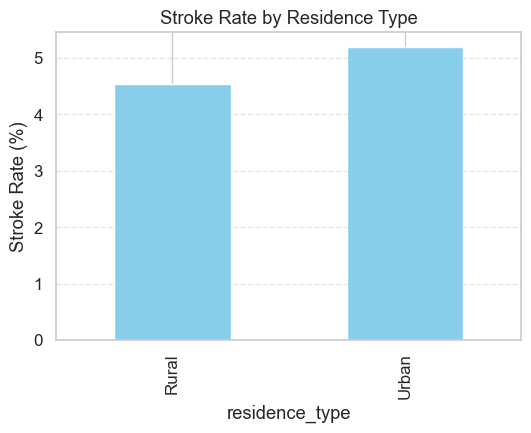

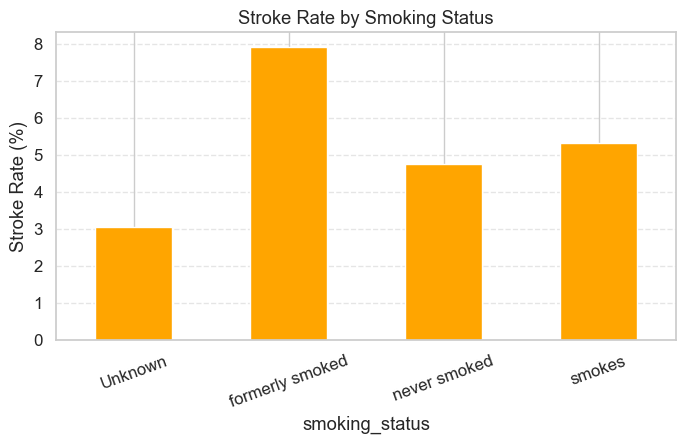

In [201]:


# Residence type bar chart
plt.figure(figsize=(6, 4))
stroke_by_residence.plot(kind='bar', color='skyblue')
plt.title('Stroke Rate by Residence Type')
plt.ylabel('Stroke Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Smoking status bar chart
plt.figure(figsize=(8, 4))
stroke_by_lifestyle.plot(kind='bar', color='orange')
plt.title('Stroke Rate by Smoking Status')
plt.ylabel('Stroke Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=20)
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> What patterns emerge when analyzing age and lifestyle factors together?
</span>

How does stroke probability change as more risk factors overlap (e.g., age > 60, smoking, and heart disease)?

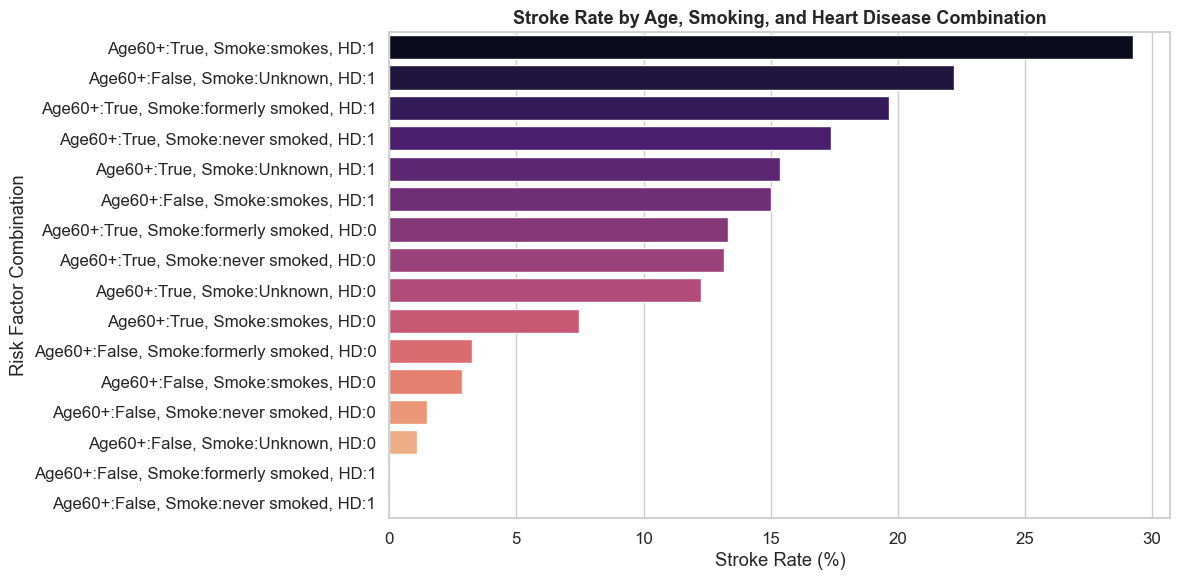

In [207]:

# Create a binary column for age > 60
df['age_over_60'] = df['age'] > 60

# Drop rows with missing smoking_status to ensure clean grouping
df_filtered = df.dropna(subset=['smoking_status'])

# Group by age, smoking, and heart disease to calculate stroke rates
grouped = df_filtered.groupby(['age_over_60', 'smoking_status', 'heart_disease'])['stroke'].mean().reset_index()
grouped['stroke'] *= 100  # Convert to percentage

# Create label for each combination
grouped['combo'] = grouped.apply(
    lambda row: f"Age60+:{row.age_over_60}, Smoke:{row.smoking_status}, HD:{row.heart_disease}",
    axis=1
)

# Sort by stroke rate
grouped = grouped.sort_values(by='stroke', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='stroke', y='combo', palette='magma')
plt.title('Stroke Rate by Age, Smoking, and Heart Disease Combination', fontsize=13, weight='bold')
plt.xlabel('Stroke Rate (%)')
plt.ylabel('Risk Factor Combination')
plt.tight_layout()
plt.show()


The highest stroke risk (≈29%) is for people who:

Are over 60

Currently smoke

Have heart disease

Stroke risk drops significantly when any one of these risk factors is missing, especially heart disease.

Even younger individuals with heart disease and unknown smoking status are in the top 2.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Does marital status (ever_married) correlate with stroke likelihood?
</span>

ever_married
No     1.650541
Yes    6.561288
Name: stroke_numeric, dtype: float64


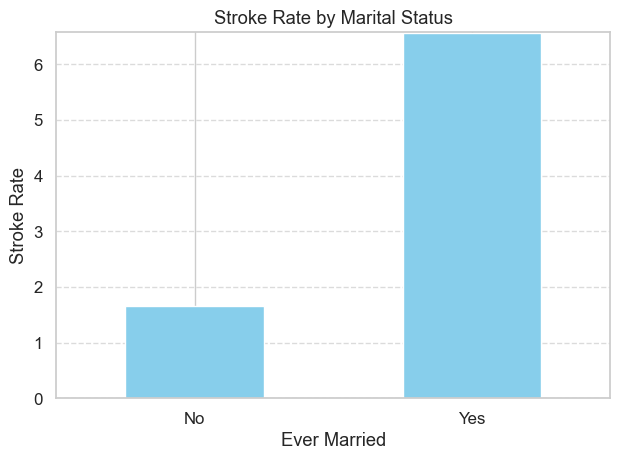

In [210]:
# Ensure the stroke column is numeric
df['stroke_numeric'] = df['stroke'].astype(int)

# Calculate stroke rate by marital status
stroke_rate_by_marital_status = df.groupby('ever_married')['stroke_numeric'].mean() * 100

# Print the results
print(stroke_rate_by_marital_status)

# Plot the bar chart
stroke_rate_by_marital_status.plot(kind='bar', color='skyblue')
plt.title('Stroke Rate by Marital Status')
plt.ylabel('Stroke Rate')
plt.xlabel('Ever Married')
plt.xticks(rotation=0)
plt.ylim(0, stroke_rate_by_marital_status.max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



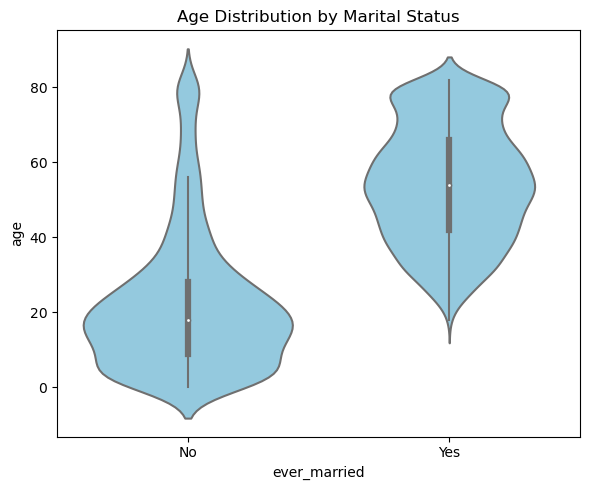

In [100]:
plt.figure(figsize=(6,5))
sns.violinplot(x='ever_married', y='age', data=df, color='skyblue')
plt.title('Age Distribution by Marital Status')
plt.tight_layout()


### This bar chart shows that individuals who have **ever been married** have a significantly **higher stroke rate** compared to those who have **never been married**, suggesting a possible link between marital history and stroke risk.


### This difference is likely not caused directly by marital status itself, but rather by confounding factors like: Older average age among married individuals.Higher prevalence of comorbidities (e.g., hypertension, heart disease)

### People who have been married have a stroke risk that is approximately 3.97 times higher than those who have never been married.

This bar chart shows that the **stroke rate is slightly higher among individuals living in urban areas** compared to those in rural areas, suggesting a modest difference in stroke risk based on residence type.


<div class="alert alert-block alert-success">

### <span style=" color:red"> How are continuous variables related to categorical variables?
</span>

Categorical Variables (Kategori tipi - sınıflara ayrılmış):
gender

ever_married

work_type

residence_type

smoking_status

stroke (0 = No, 1 = Yes)

heart_disease (0 = No, 1 = Yes)

hypertension (0 = No, 1 = Yes)


Continuous Variables (Sürekli - sayısal değer içeren):
age (float)

avg_glucose_level (float)

bmi (float)

In [211]:
df.dtypes

gender               category
age                   float64
hypertension            int32
heart_disease           int32
ever_married         category
work_type            category
residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
age_group            category
bmi_category         category
glucose_category     category
stroke_numeric          int32
age_over_60              bool
bmi_over_30              bool
is_smoker                bool
risk_combo             object
dtype: object

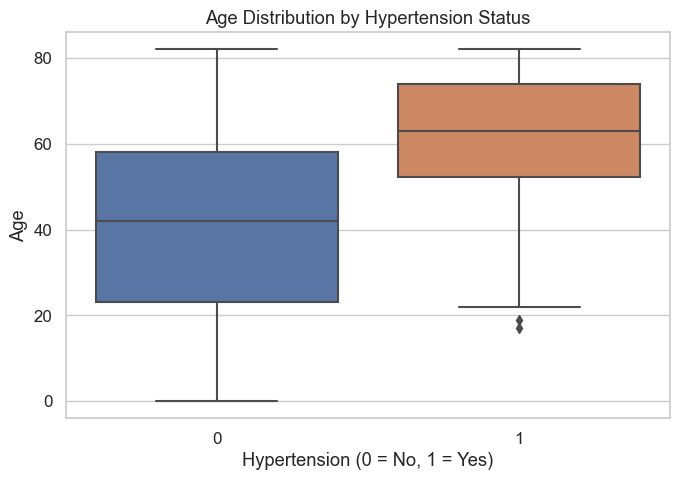

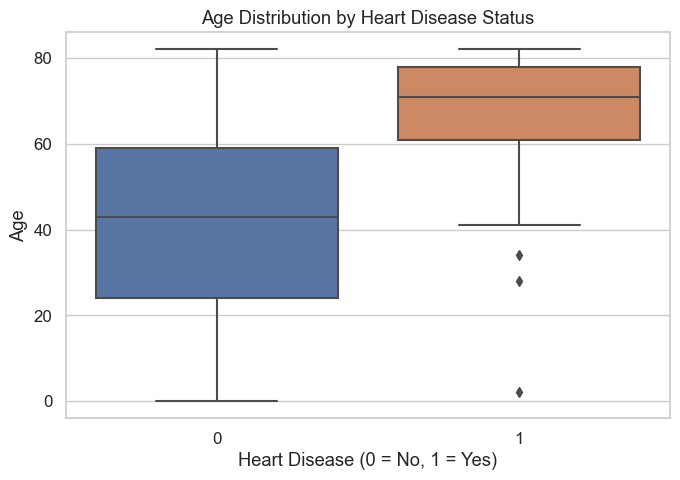

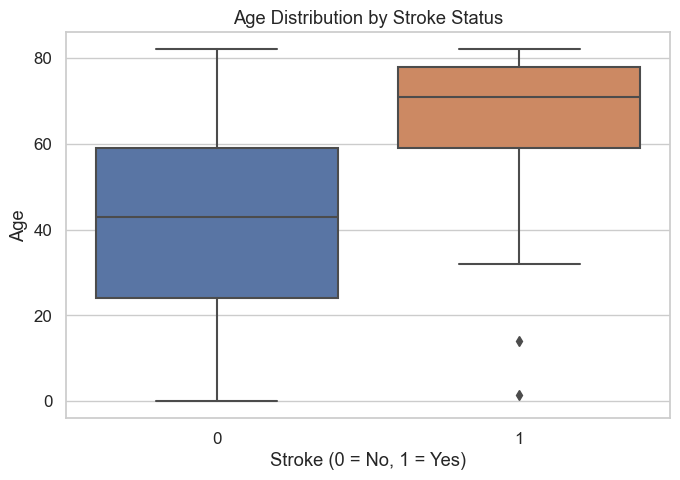

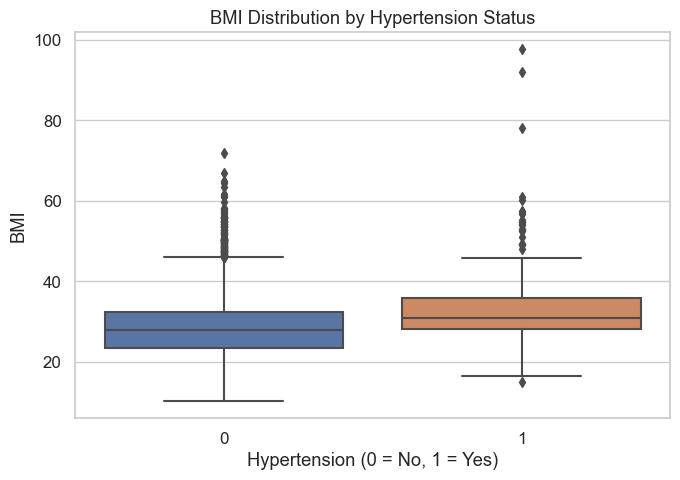

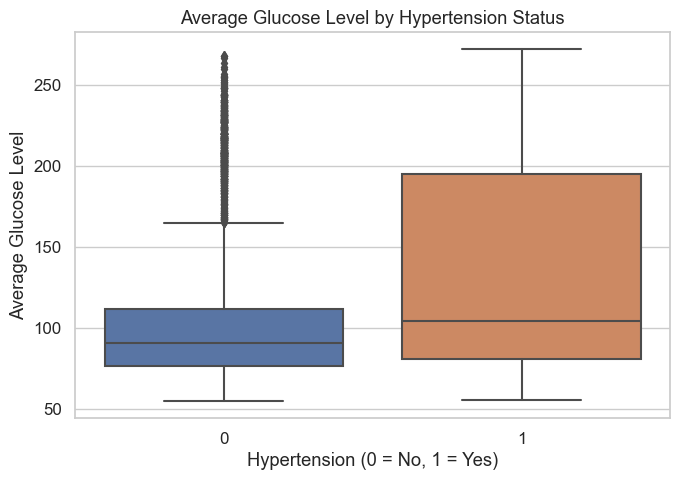

In [212]:
# Create and display 5 key visualizations based on the top significant relationships

# 1. Age vs Hypertension
plt.figure(figsize=(7, 5))
sns.boxplot(x='hypertension', y='age', data=df)
plt.title("Age Distribution by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# 2. Age vs Heart Disease
plt.figure(figsize=(7, 5))
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# 3. Age vs Stroke
plt.figure(figsize=(7, 5))
sns.boxplot(x='stroke', y='age', data=df)
plt.title("Age Distribution by Stroke Status")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# 4. BMI vs Hypertension
plt.figure(figsize=(7, 5))
sns.boxplot(x='hypertension', y='bmi', data=df)
plt.title("BMI Distribution by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

# 5. Glucose vs Hypertension
plt.figure(figsize=(7, 5))
sns.boxplot(x='hypertension', y='avg_glucose_level', data=df)
plt.title("Average Glucose Level by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.tight_layout()
plt.show()


Age vs Hypertension
→ Individuals with hypertension are significantly older on average compared to those without it.

Age vs Heart Disease
→ People with heart disease tend to be noticeably older, indicating age is a strong factor.

Age vs Stroke
→ Stroke cases are more prevalent among older individuals, highlighting age as a major risk factor.

BMI vs Hypertension
→ Those with hypertension generally have a higher Body Mass Index, suggesting a correlation with weight-related health risks.

Average Glucose Level vs Hypertension
→ Hypertensive patients tend to have higher glucose levels, which may indicate a link between blood pressure and glucose regulation.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.
</span>


# CORROLATION ANALYSIS

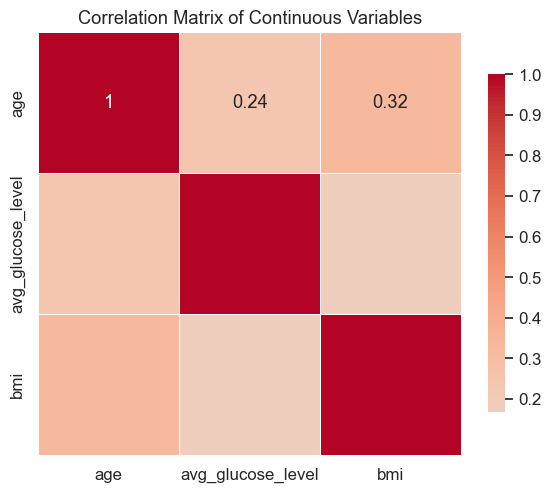

In [213]:


# # Continuous variables to analyze correlation
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

# Compute the correlation matrix
corr_matrix = df[continuous_vars].corr()

# Set up a heatmap with a diverging colormap for visual clarity
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Continuous Variables")
plt.tight_layout()
plt.show()


# Multivariate Analysis: Group Comparison

How do multiple risk factors interact together?

To examine how combinations of multiple binary categorical conditions — Stroke, Hypertension, and Heart Disease — affect the distributions of continuous health indicators such as Age, BMI, and Average Glucose Level.

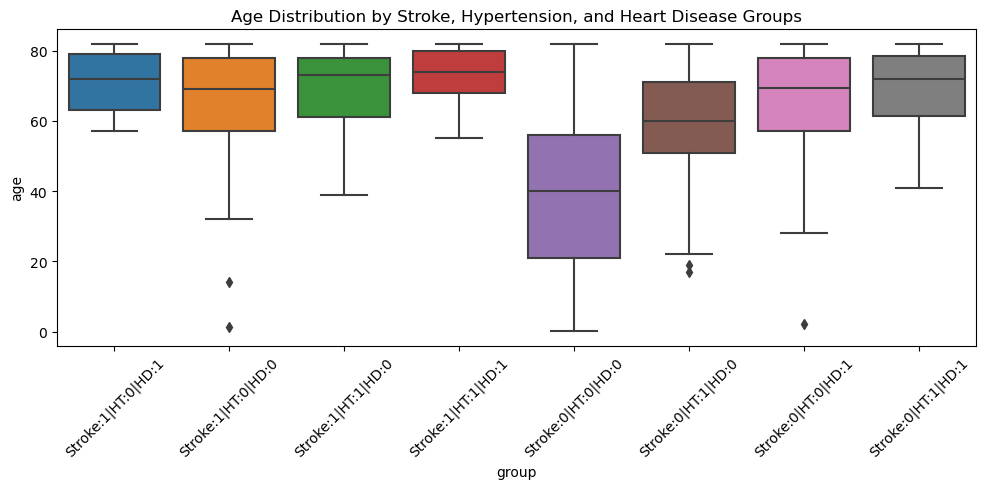

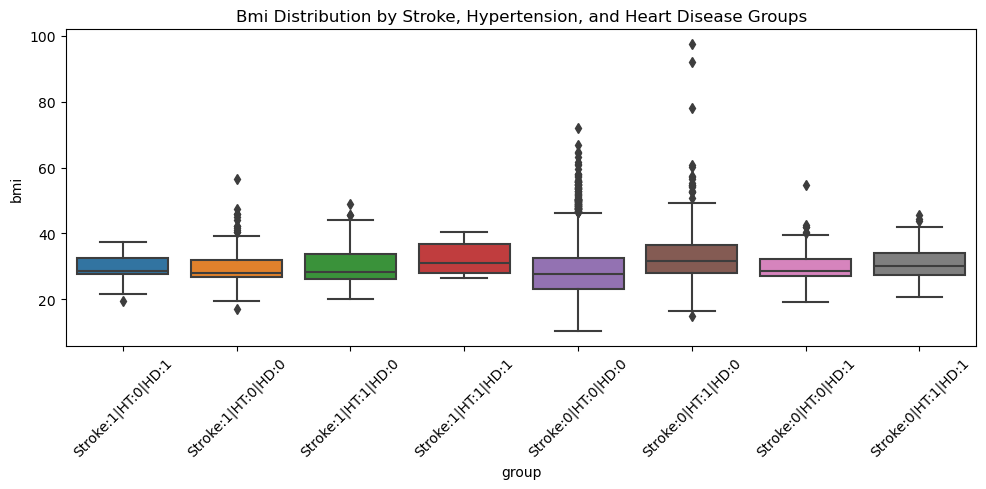

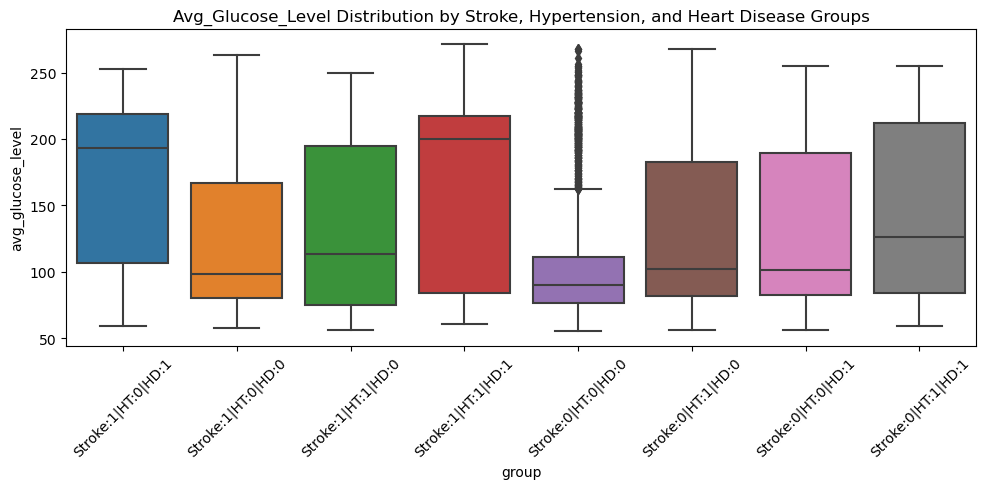

In [116]:


# Create a new combined group column: Stroke presence and comorbidities
df['group'] = df.apply(lambda x: f"Stroke:{x['stroke']}|HT:{x['hypertension']}|HD:{x['heart_disease']}", axis=1)

# Focus only on major continuous risk indicators
variables_to_plot = ['age', 'bmi', 'avg_glucose_level']

# Plot distributions of each continuous variable across the new multivariate groups
for var in variables_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='group', y=var, data=df)
    plt.title(f"{var.title()} Distribution by Stroke, Hypertension, and Heart Disease Groups")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Age

The group Stroke:1|HT:1|HD:1 shows the highest median age.

This confirms that older individuals with multiple comorbidities are at highest risk.

BMI

BMI is generally higher in hypertensive individuals, regardless of stroke status.

This supports a known link between obesity and blood pressure issues.

Average Glucose Level

Stroke patients with hypertension (Stroke:1|HT:1|HD:...) show higher glucose levels.

Suggests a potential link between metabolic disorders and stroke risk.

Multivariate analysis reveals that individuals with stroke, hypertension, and heart disease are older and show higher BMI and glucose levels. This indicates a cumulative effect of multiple health conditions on stroke risk.

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions
</span>



## This project aimed to uncover patterns and risk factors associated with stroke using a healthcare dataset.

### Through exploratory data analysis, we found that stroke incidence increases significantly with age, particularly after 60.
### Individuals with heart disease or hypertension were at substantially higher risk, especially when combined with smoking.
### Smoking status played a clear role, with current smokers showing the highest stroke rates across all age groups.
### Married individuals surprisingly had a stroke rate nearly 4 times higher than unmarried ones, likely due to confounding variables like age and comorbidities.
### A Random Forest model identified **average glucose level**, **BMI**, and **age** as the top three predictors of stroke.
### Categorical features such as **smoking status** and **work type** also showed moderate predictive importance.
### Visualizations like heatmaps and bar plots effectively illustrated how overlapping risk factors exponentially increase stroke probability.
### Grouped analysis revealed that the most at-risk group included people over 60 who smoke and have heart disease, with a stroke rate approaching 30%.
### These findings highlight the importance of early intervention and lifestyle management in populations at high risk for stroke.




---

## 👥 Katılımcılar

- Ahmet Derya  
- Baris Gungor  
- Betul Gurlevik  
- Isilay Tamer  
- Kaan Altay  
- Mehmet Duzenli  
- Mehmet Enes Soyler  
- Meray Erzi  
- Mesut Karagöz  
- Muhammed Bakirtas  
- Nazgul Barpieva  
- Neslihan Bozkurt  
- Sule Demir  
- Yavuz Selim Kucukonder  
- Zaka Mikayilzade  

---

### 🎓 Proje Danışmanı  
**Huriye Buyukpancar**


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations!</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |